# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] 
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | minas de marcona
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | vadso
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | wenchang
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | impfondo
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | tagiura
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | ituiutaba
Processing Record 21 of Set 1 | hanceville
Processing Record 22 of Set 1 

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,13.58,73,3,2.90,AU,1683577467
1,minas de marcona,-15.2119,-75.1103,20.08,63,4,6.70,PE,1683577468
2,yellowknife,62.4560,-114.3525,14.29,51,75,2.57,CA,1683577194
3,waitangi,-43.9535,-176.5597,15.46,95,100,3.13,NZ,1683577468
4,vadso,70.0744,29.7487,3.09,81,75,5.66,NO,1683577468


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv(
    "output_data/cities.csv", 
    index_label="City_ID"
    )

In [44]:
# Read saved data
city_data_df = pd.read_csv(
    "output_data/cities.csv", 
    index_col="City_ID"
    )

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,13.58,73,3,2.90,AU,1683577467
1,minas de marcona,-15.2119,-75.1103,20.08,63,4,6.70,PE,1683577468
2,yellowknife,62.4560,-114.3525,14.29,51,75,2.57,CA,1683577194
3,waitangi,-43.9535,-176.5597,15.46,95,100,3.13,NZ,1683577468
4,vadso,70.0744,29.7487,3.09,81,75,5.66,NO,1683577468


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

c:\Users\edmon\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


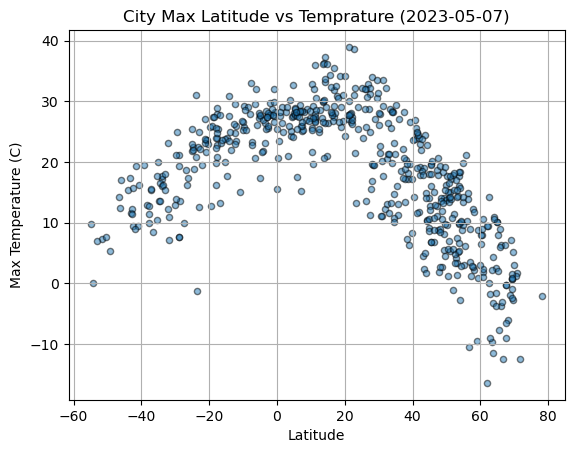

In [45]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(
    kind= 'scatter', 
    x= 'Lat', 
    y= 'Max Temp', 
    grid= True, 
    edgecolors= 'black',
    alpha= .5
    )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temprature (2023-05-07)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

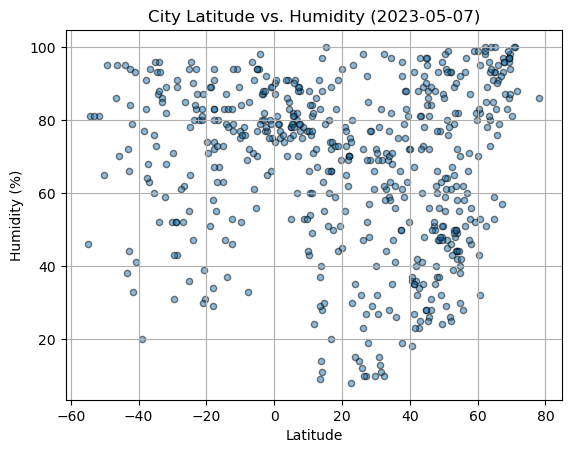

In [46]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(
    kind= 'scatter',
    x= 'Lat',
    y= 'Humidity',
    grid= True,
    edgecolors= 'black',
    alpha= .5
    )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-05-07)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

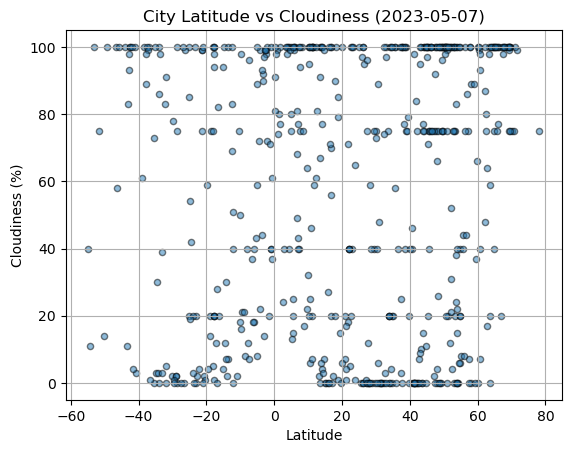

In [47]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(
    kind= 'scatter', 
    x= 'Lat',
    y= 'Cloudiness', 
    grid= True, 
    edgecolors= 'black',
    alpha= .5
    )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2023-05-07)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

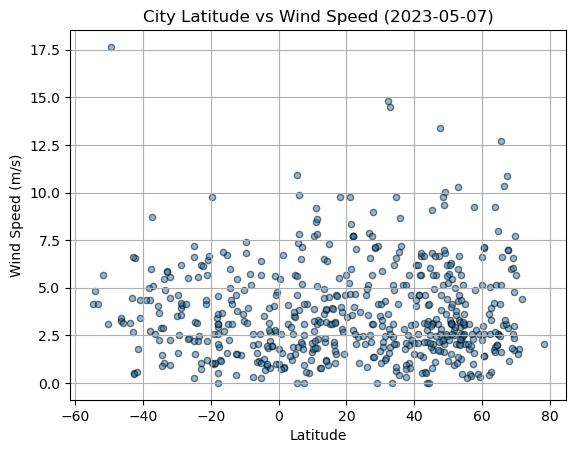

In [48]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(
    kind= 'scatter', 
    x= 'Lat',
    y= 'Wind Speed', 
    grid= True, 
    edgecolors= 'black',
    alpha= .5
    )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-05-07)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,14.29,51,75,2.57,CA,1683577194
4,vadso,70.0744,29.7487,3.09,81,75,5.66,NO,1683577468
7,wenchang,30.9040,118.4887,11.10,78,48,2.17,CN,1683577470
8,ilulissat,69.2167,-51.1000,-0.99,86,75,2.57,GL,1683577470
10,constantia,44.1833,28.6500,10.39,92,100,4.07,RO,1683577471


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,13.58,73,3,2.90,AU,1683577467
1,minas de marcona,-15.2119,-75.1103,20.08,63,4,6.70,PE,1683577468
3,waitangi,-43.9535,-176.5597,15.46,95,100,3.13,NZ,1683577468
5,port elizabeth,-33.9180,25.5701,17.28,96,0,1.03,ZA,1683577469
6,edinburgh of the seven seas,-37.0676,-12.3116,15.45,63,100,5.11,SH,1683577469


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.662934420024611


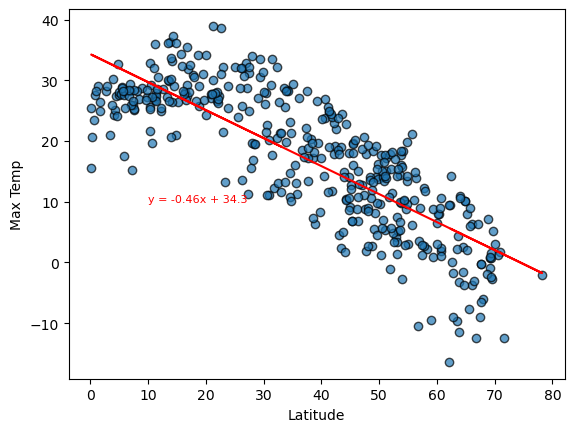

In [52]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (10,10), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig5.png")

# Show Chart
plt.show()

The r-squared is: 0.6194312368842984


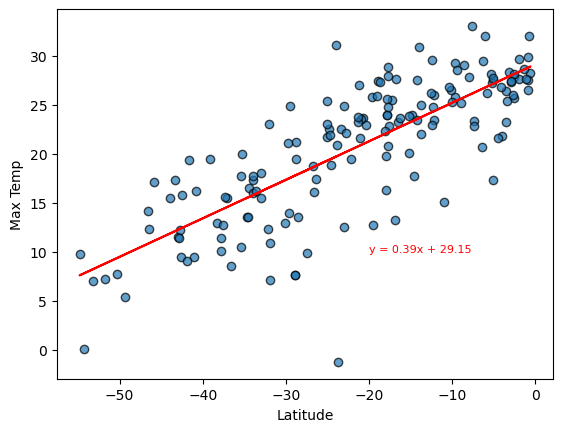

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (-20,10), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig6.png")

# Show Chart
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere we see a moderately correlated negative linear relationship; as the temperature decreases as latitude increases. For the southern hemisphere the see a moderately correlated positive linear relationship, the temperature increases as the latitude decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00719702724224081


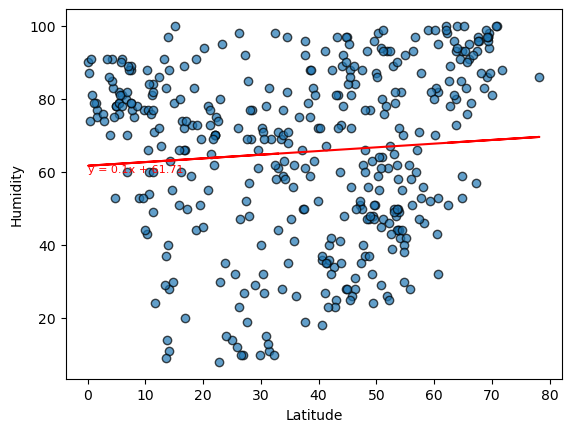

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (0,60), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig7.png")

# Show Chart
plt.show()

The r-squared is: 0.013237752805666126


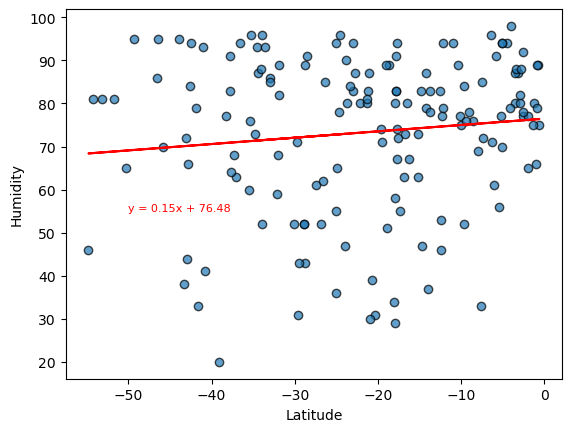

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (-50,55), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig8.png")

# Show Chart
plt.show()

**Discussion about the linear relationship:** Hemispheres are not correlated with humidity. Based on the r-values for both of the humidity analysis.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.009757377292400178


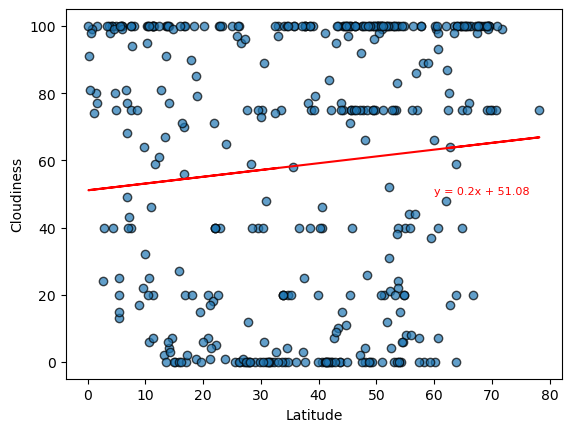

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (60,50), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig9.png")

# Show Chart
plt.show()

The r-squared is: 0.0032093729068372184


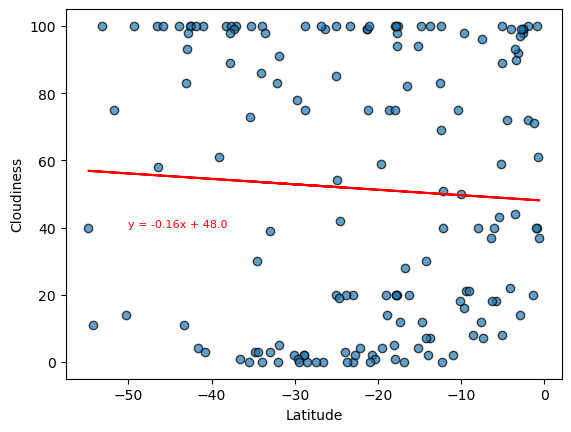

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (-50,40), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig10.png")

# Show Chart
plt.show()

**Discussion about the linear relationship:** Cloudiness is not directly linked to hemishpere, both have low r-values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 8.79885259108581e-05


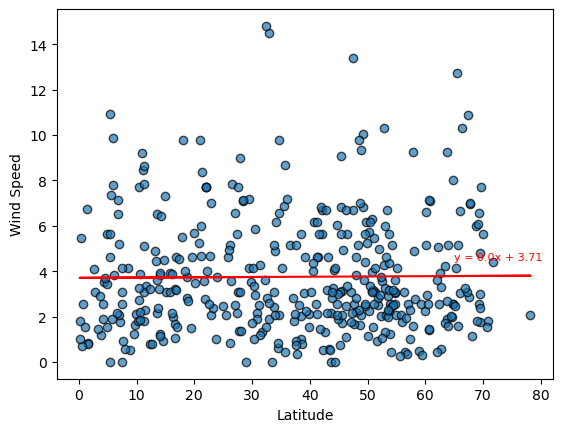

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (65,4.5), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig11.png")

# Show Chart
plt.show()

The r-squared is: 0.051383151855524965


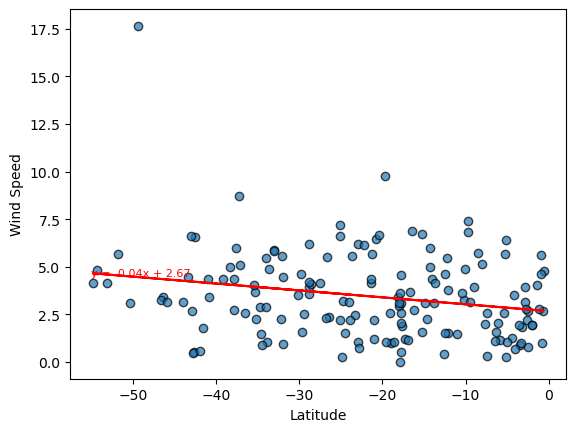

In [59]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Charting and Beautification
plt.scatter(x_values, y_values, edgecolors= 'black', alpha= .7)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq, (-55,4.5), fontsize= 8, color= 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')

# Saving Figure
plt.savefig("output_data/Fig12.png")

# Show Chart
plt.show()

**Discussion about the linear relationship:** The r values for both hemispheres are low. There are other factors that would need ot be taken into account to properly determine linkage between hemispheres and wind speed. 